In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir(os.path.join('..', 'dynamic_programming'))
import import_ipynb
from grid_world import standard_grid, negative_grid, ACTION_SPACE
from iterative_policy_evaluation_deterministic import print_policy, print_values

importing Jupyter notebook from grid_world.ipynb
importing Jupyter notebook from iterative_policy_evaluation_deterministic.ipynb


In [2]:
GAMMA = 0.9
ALPHA = 0.1
SMALL_ENOUGH = 1e-5

In [3]:
def epsilon_greedy(greedy_policy, grid, eps = 0.1) :
    if np.random.random() < (1 - eps) :
        indices = np.where(greedy_policy == np.max(greedy_policy))[0]
        return ACTION_SPACE[np.random.choice(indices)]
    else :
        return np.random.choice(grid.actions[s])

Rewards
+--------+--------+--------+--------+
| -0.100 | -0.100 | -0.100 |  1.000 |
+--------+--------+--------+--------+
| -0.100 |  0.000 | -0.100 | -1.000 |
+--------+--------+--------+--------+
| -0.100 | -0.100 | -0.100 | -0.100 |
+--------+--------+--------+--------+
Policy
+---+---+---+---+
| R | R | R |   |
+---+---+---+---+
| U |   | U |   |
+---+---+---+---+
| U | R | U | L |
+---+---+---+---+
Values
+-------+-------+-------+-------+
| 0.620 | 0.800 | 1.000 | 0.000 |
+-------+-------+-------+-------+
| 0.458 | 0.000 | 0.800 | 0.000 |
+-------+-------+-------+-------+
| 0.312 | 0.458 | 0.620 | 0.458 |
+-------+-------+-------+-------+


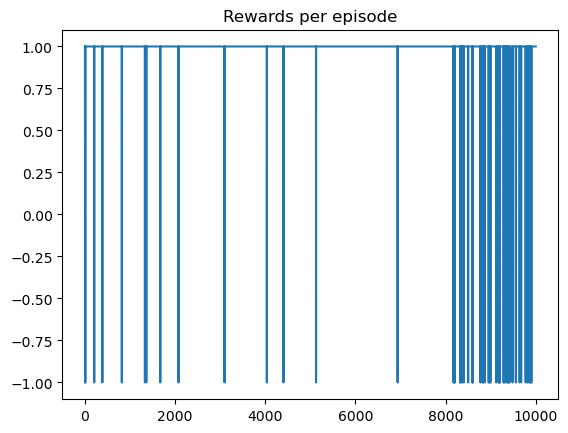

In [4]:
if __name__ == '__main__' :
    grid = negative_grid()
    
    print('Rewards')
    print_values(grid.rewards, grid)
    
    Q = pd.DataFrame(0,index=pd.Index(grid.all_states()), columns=ACTION_SPACE)
    Q = Q.sort_index()
    
    reward_per_episode = []
    state_sample_count = pd.DataFrame(np.zeros((3, 4)), dtype=np.int32)
    for i in range(10000) :
        s = grid.reset()
        a = epsilon_greedy(Q.loc[s, :], grid, eps = 0.1)
        
        epsiode_reward = 0
        while not grid.game_over():
            state_sample_count.iloc[s] = state_sample_count.iloc[s] + 1
            r = grid.move(a)
            s_next = grid.current_state()
            a_next = epsilon_greedy(Q.loc[s_next, :], grid, eps = 0.1)
            Q_old = Q.loc[s, a]
            Q.loc[s, a] = Q.loc[s, a] + ALPHA * (r + GAMMA * Q.loc[s_next, :].values.max() - Q.loc[s, a])
            s = s_next
            a = a_next
            epsiode_reward += r
        reward_per_episode.append(r)
    
    V = {}
    policy = {}
    for i, row in Q.iterrows():
        V[i] = np.max(row)
        if not grid.is_terminal(i) :
            policy[i] = ACTION_SPACE[np.argmax(row)]
        
    print('Policy')
    print_policy(policy, grid)
    
    print('Values')
    print_values(V, grid)
    
    plt.plot(reward_per_episode)
    plt.title('Rewards per episode')
    
    

In [5]:
Q

U         D         L         R
0 0  0.458000  0.312200  0.082642  0.620000
  1 -0.019000  0.620000  0.456658  0.800000
  2  0.786861  0.785402  0.620000  1.000000
  3  0.000000  0.000000  0.000000  0.000000
1 0  0.458000  0.177856 -0.102977  0.312200
  2  0.800000 -0.010900  0.612800 -0.994846
  3  0.000000  0.000000  0.000000  0.000000
2 0  0.312200 -0.048636 -0.169547  0.312200
  1  0.311670 -0.111592 -0.086155  0.458000
  2  0.620000 -0.057699  0.311958  0.310205
  3 -0.409510 -0.038595  0.457706  0.115072

In [6]:
print('Update frequency')
state_sample_count / state_sample_count.sum()

Update frequency


,0,1,2,3
0,0.328661,0.861545,0.781201,0.0
1,0.327539,0.000000,0.105035,0.0
2,0.343800,0.138455,0.113764,1.0
